# Intro to Object Detection Colab

Welcome to the object detection colab! This demo will take you through the steps of running an "out-of-the-box" detection model in SavedModel format on a collection of images.



Imports

In [1]:
# !pip install -U --pre tensorflow=="2.2.0"

In [2]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
# # Install the Object Detection API
# %%bash
# cd models/research/
# protoc object_detection/protos/*.proto --python_out=.
# cp object_detection/packages/tf2/setup.py .
# python -m pip install .

In [3]:
import io
import os
import scipy.misc
import numpy as np
import six
import time

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import visualization_utils as viz_utils

%matplotlib inline

In [27]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Load the COCO Label Map

# category_index = {
#     1: {'id': 1, 'name': 'rock'},
#     2: {'id': 2, 'name': 'paper'},
#     3: {'id': 3, 'name': 'scissors'},
#     4: {'id': 4, 'name': 'thumb'},
#     5: {'id': 5, 'name': 'other'}
# }


category_index = {
    1: {'id': 1, 'name': 'hand'},
    2: {'id': 2, 'name': 'hand'},
    3: {'id': 3, 'name': 'hand'},
    4: {'id': 4, 'name': 'hand'},
    5: {'id': 5, 'name': 'hand'}
}

In [11]:
start_time = time.time()
tf.keras.backend.clear_session()
detect_fn = tf.saved_model.load(r'C:\Users\Weronika\Desktop\models-master\models\research\object_detection\hand_detection\inference_graph\saved_model')
end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time: ' + str(elapsed_time) + 's')

Elapsed time: 25.899457693099976s


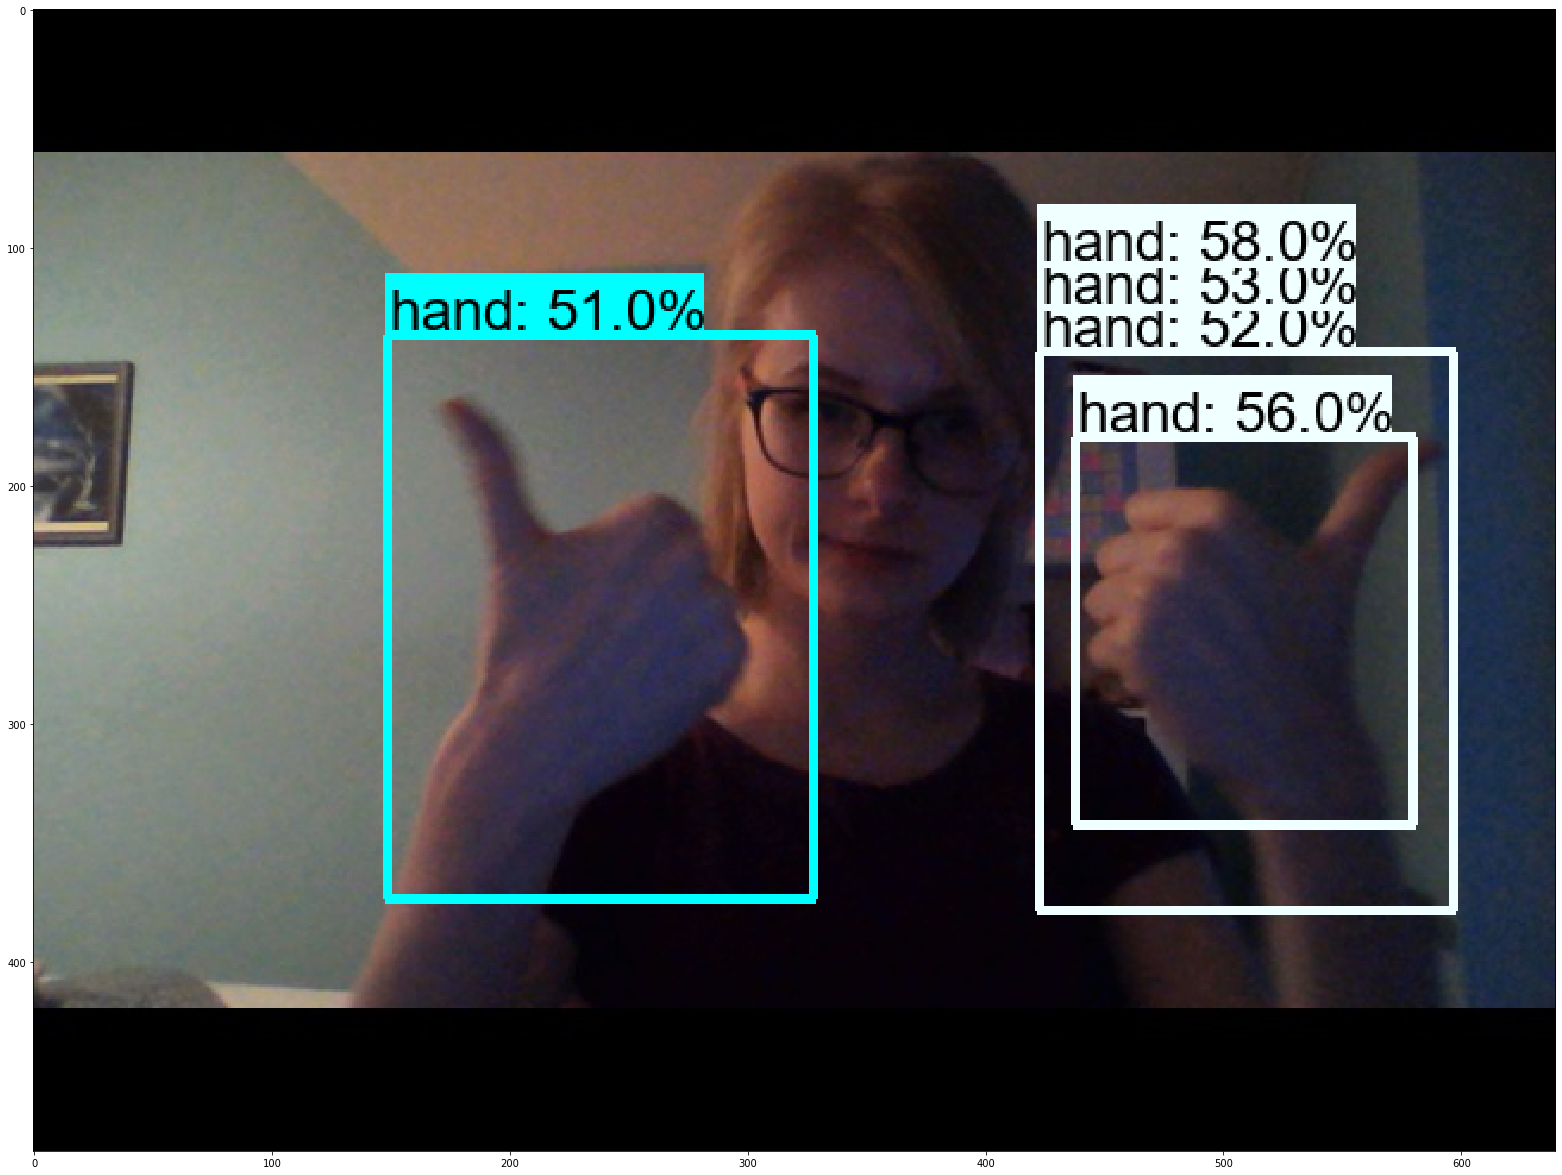

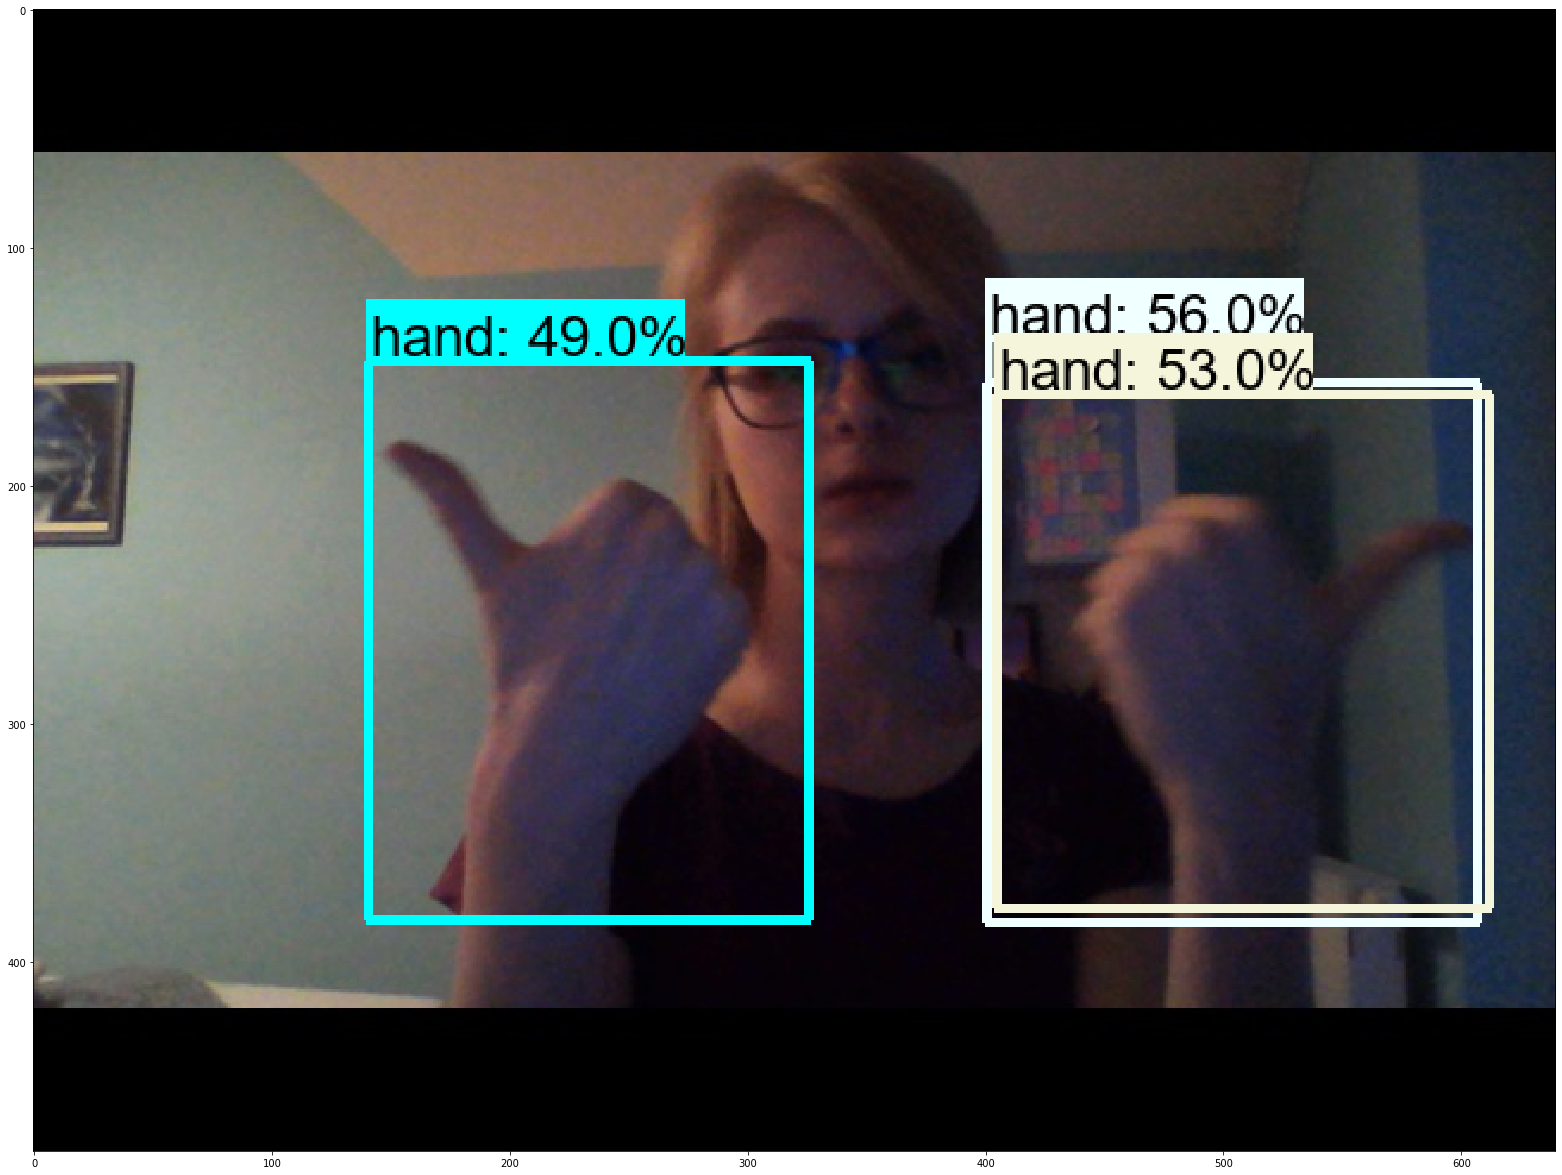

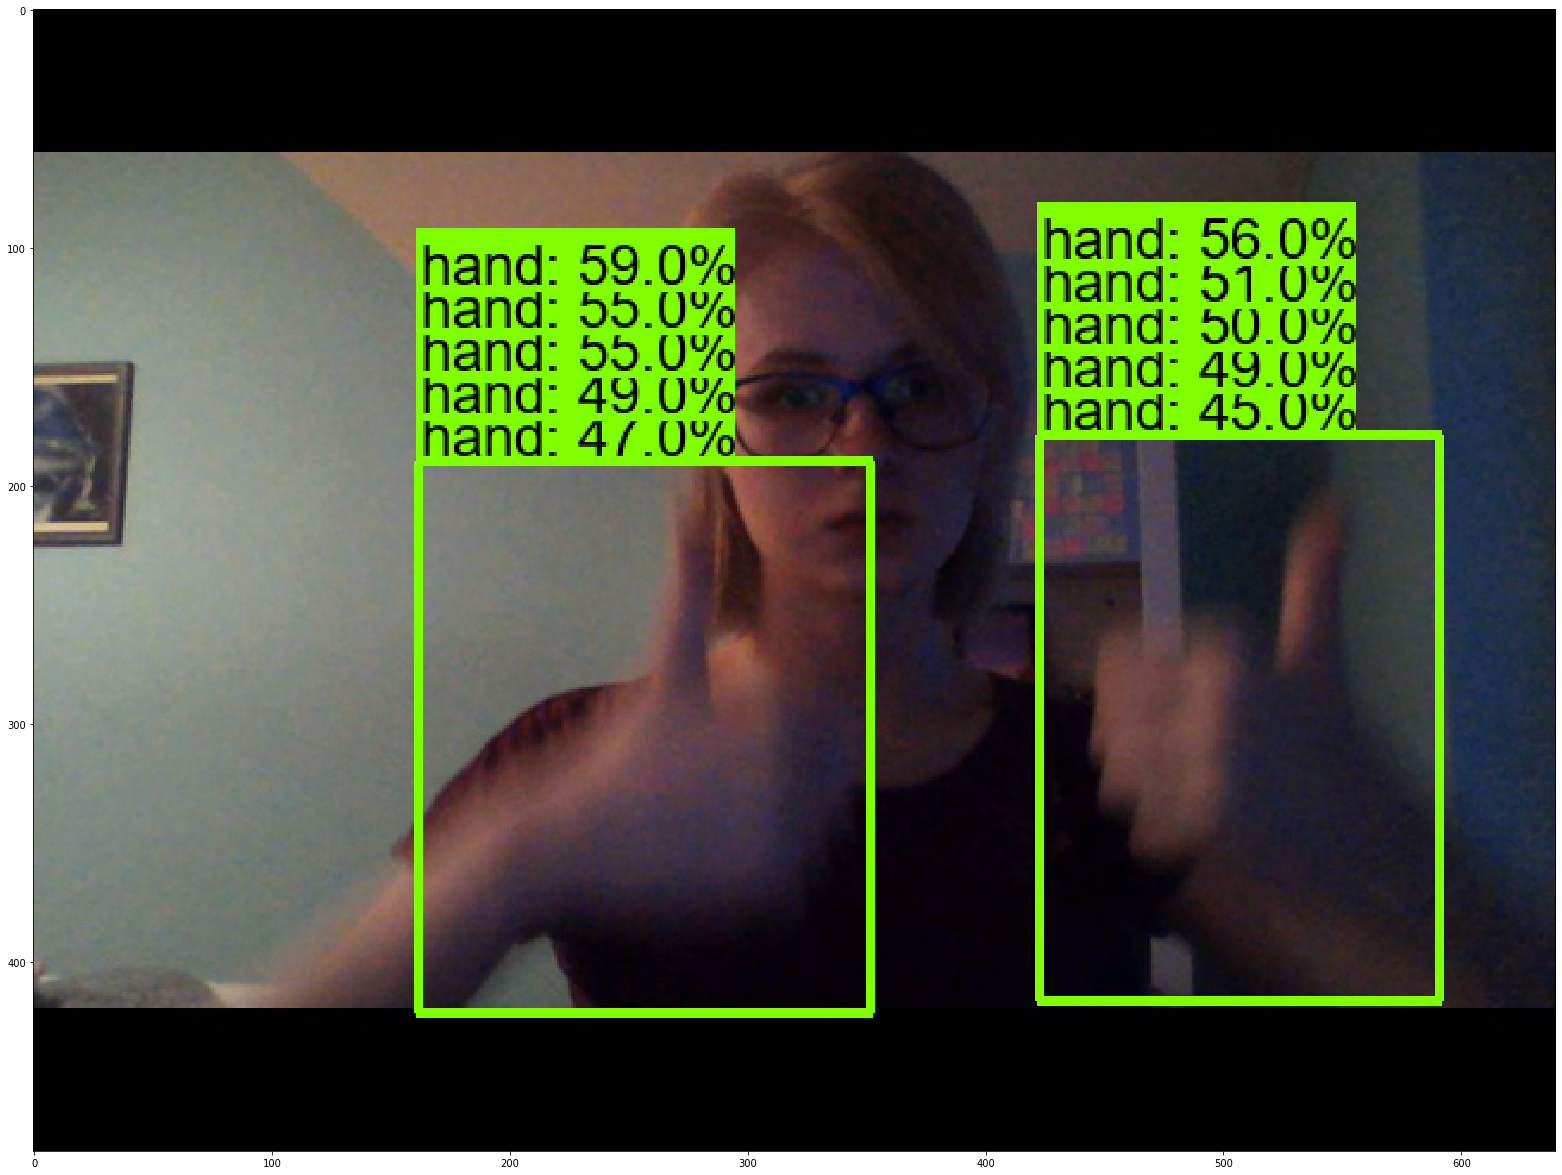

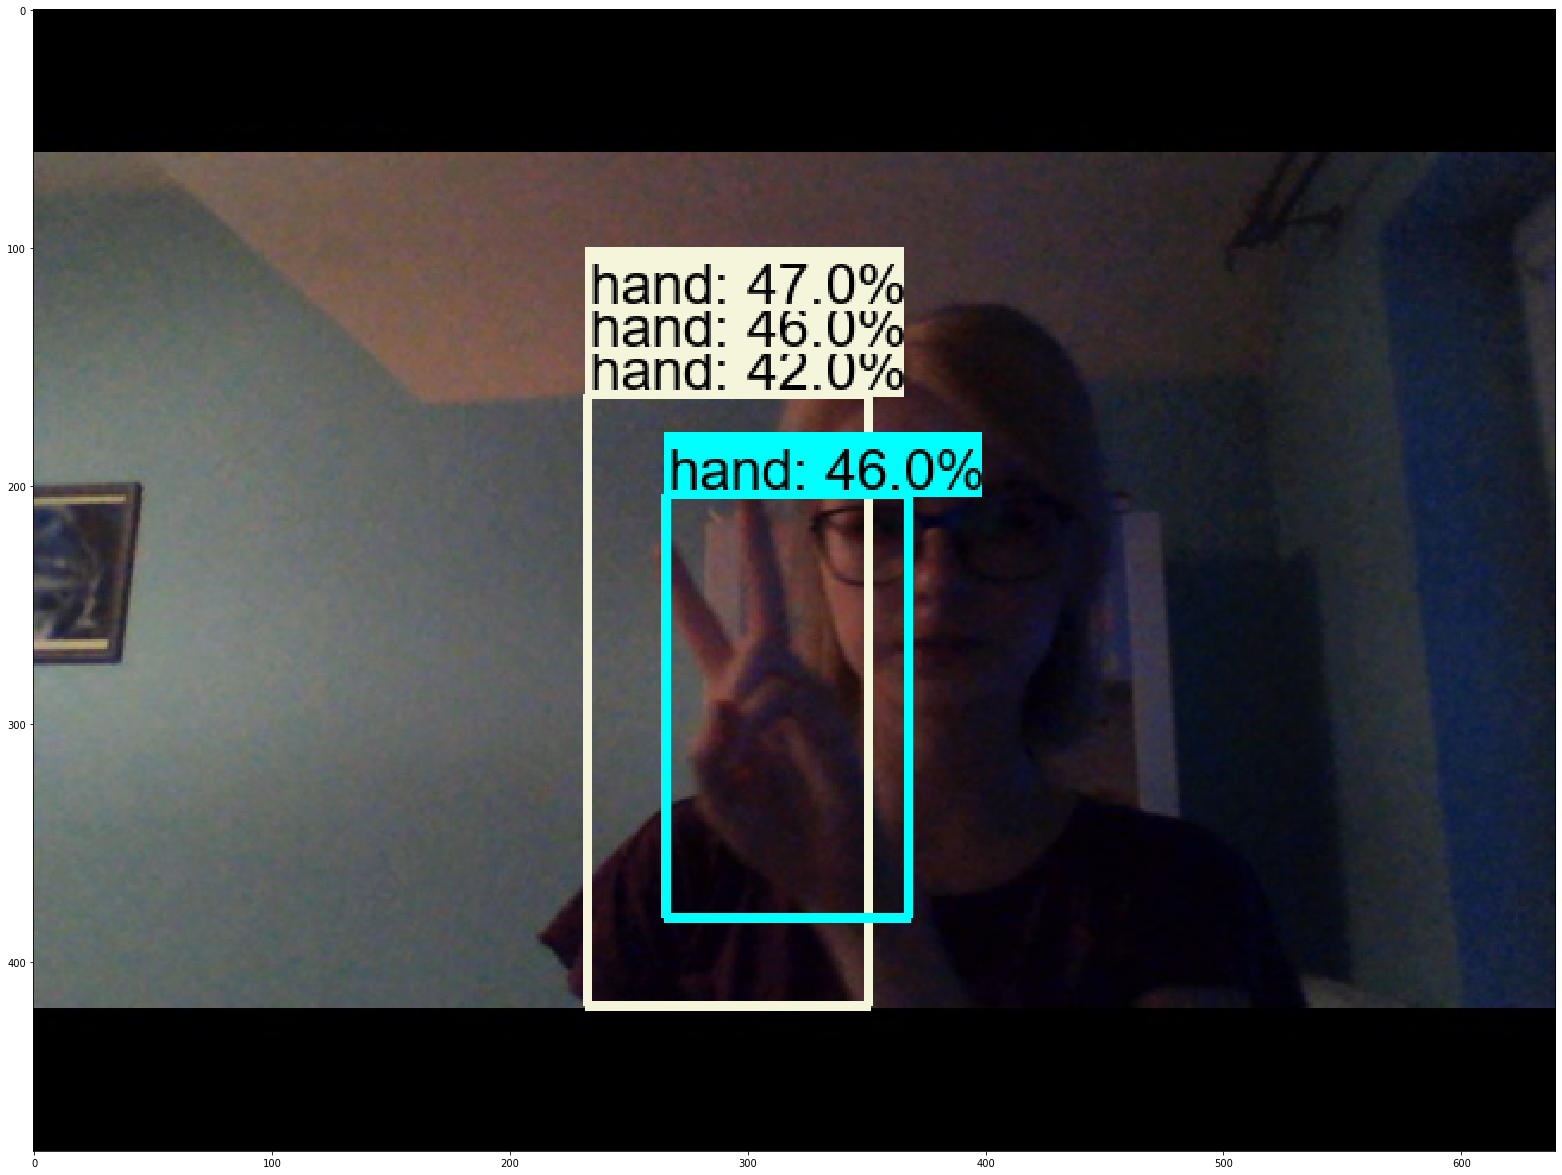

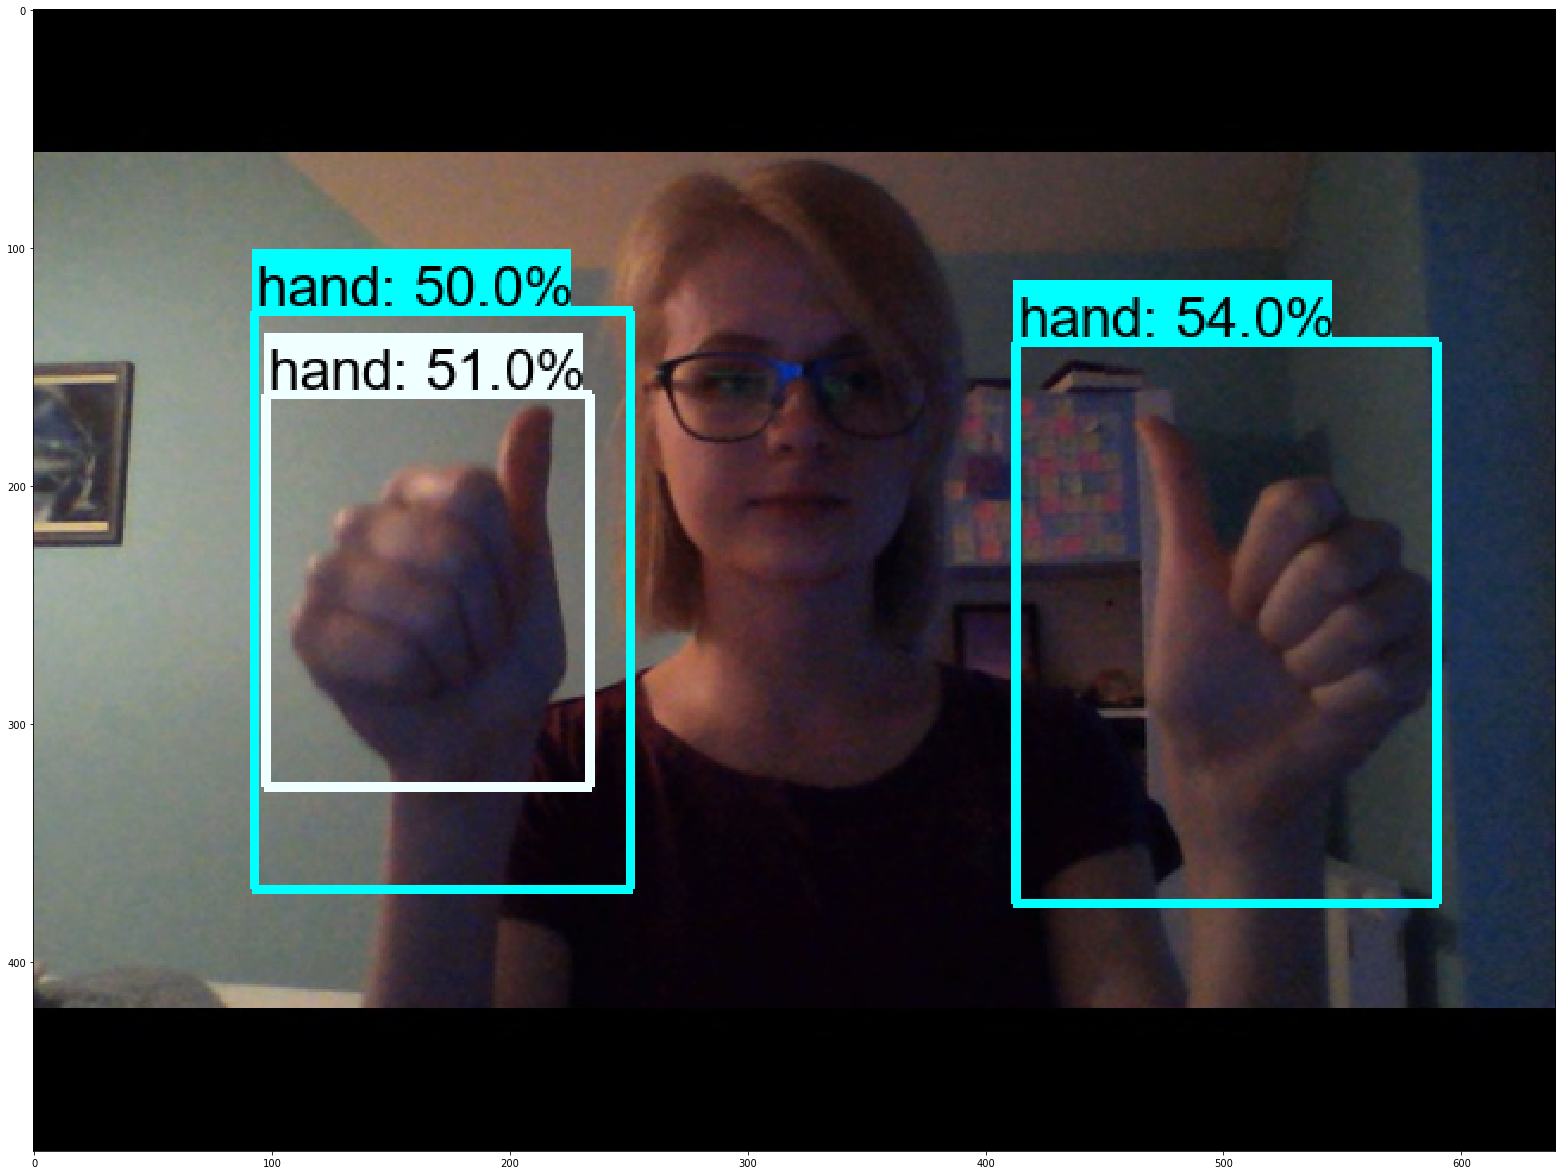

Elapsed time: 0.024597692489624023 second per image


In [33]:
import time

image_dir = r'C:\Users\Weronika\Desktop\models-master\models\research\object_detection\hand_detection\images\test'

elapsed = []
images_list = os.listdir(image_dir)
images_list = [image_dir + "\\" + i for i in images_list]
for i in range(40, 45):
  image_path = images_list[i]
  image_np = load_image_into_numpy_array(image_path)
  input_tensor = np.expand_dims(image_np, 0)
  start_time = time.time()
  detections = detect_fn(input_tensor)
  end_time = time.time()
  elapsed.append(end_time - start_time)

  plt.rcParams['figure.figsize'] = [42, 21]
  label_id_offset = 1
  image_np_with_detections = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=3,
        min_score_thresh=.40,
        agnostic_mode=False)
#   plt.subplot(2, 1, i+1)
  plt.imshow(image_np_with_detections)
  plt.show()

mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')